<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 4</h1>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2025-06-24 10:40:37.904566: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 10:40:39.167713: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 10:40:39.763148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750754440.338604    7143 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750754440.492293    7143 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750754441.715778    7143 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - Regression with sequential model</h1>

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 10.8509 - val_loss: 9.9661
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - loss: 10.0175 - val_loss: 9.2623
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - loss: 9.3015 - val_loss: 8.6578
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 8.6858 - val_loss: 8.1381
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - loss: 8.1557 - val_loss: 7.6908
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - loss: 7.6987 - val_loss: 7.3052
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - loss: 7.3041 - val_loss: 6.9722
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - loss: 6.9629 - val_loss: 6.6842
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - loss: 6.6672 - val_loss: 6.4346
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 6.4104 - val_loss: 6.2177
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - loss: 6.1868 - val_loss: 6.0287
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - loss: 5.99

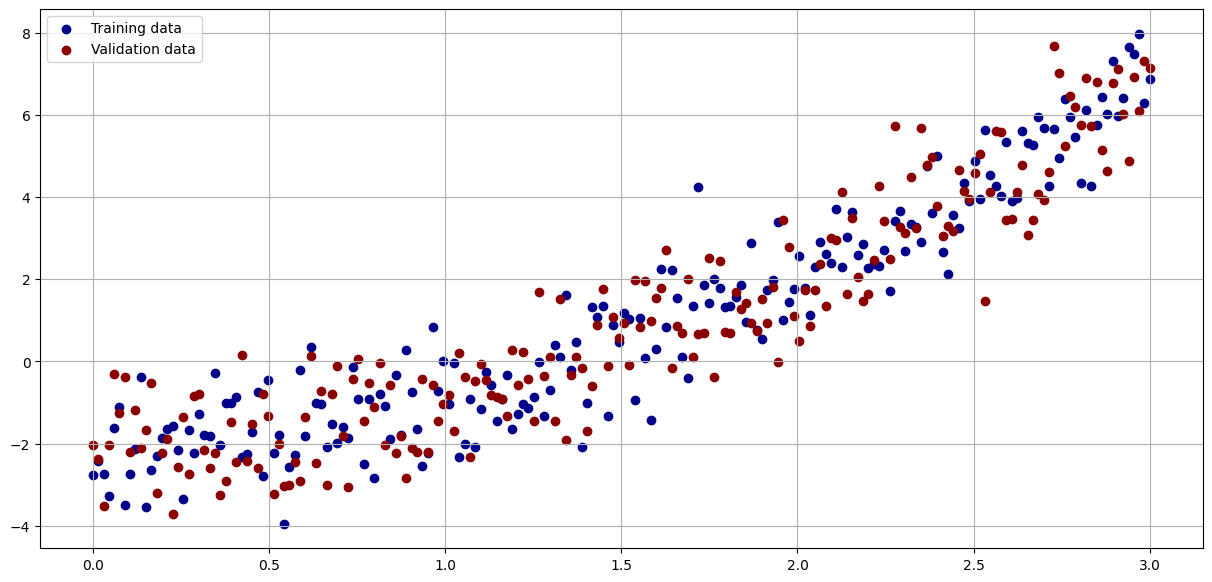

In [ ]:
# Importo i dati (che sono già divisi in training e validation set)
data = np.loadtxt("Dati/Esercitazione4/data.dat")
xtr = data[:, 0].reshape(-1, 1)
ytr = data[:, 1].reshape(-1, 1)
xval = data[:, 2].reshape(-1, 1)
yval = data[:, 3].reshape(-1, 1)


# Sono interessato a studiare le capacità predittive di un singolo neurone e per questo motivo
# considero un modello caratterizzato da un solo layer Dense dotato di un singolo nodo. Il passo 
# successivo consiste nel compilare il modello e addestrare la rete.
model = keras.Sequential()
model.add(keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
# Specifico parametri allenamento. Ogni ciclo viene allenato con l'intero dataset di training e sono forniti anche 
# i dati x e y per la validation e quindi lo studio delle caratteristiche predittive del modello
model.fit(tf.Variable(xtr), tf.Variable(ytr), batch_size=len(xtr), epochs = 500, validation_data=(xval, yval))


# Stampo training dataset, validation dataset e predizione del modello. Quello che osserviamo
# è una descrizione non accurata dell'andamento, poichè il singolo nodo ha una capacità rappresentativa 
# lineare, mentre l'andamento da catturare sembra essere quadratico o comunque polinomiale con grado 
# diverso da uno. Riporto in un secondo grafico training e validation loss.
fig, ax = plt.subplots(2, 1, figsize = (15, 14))

ax[0].scatter(xtr, ytr, color = 'darkblue', label = "Training data")
ax[0].scatter(xval, yval, color = 'darkred', label = "Validation data")
ax[0].plot(xval, model.predict(xval), color = 'darkgreen', label = "Model prediction")

ax[1].plot(np.linspace(1, 500, 500), model.history.history['loss'], color = 'darkgreen', label = 'Training loss')
ax[1].plot(np.linspace(1, 500, 500), model.history.history['val_loss'], color = 'darkblue', label = 'Validation loss')
ax[1].set_ylabel("Loss function")
ax[1].set_xlabel("Epoca")

ax[0].legend(loc = "best")
ax[1].legend(loc = "best")
ax[0].grid(True)
ax[1].grid(True)
plt.show()